## Practice Exercises (Support Vector Regression Model)

In [53]:
from pathlib import Path 
import sys

current_root = Path.cwd()
project_root = current_root.parent.absolute()

sys.path.insert(0,str(project_root))

from config import DS03

In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [55]:
#loadin the dataset
df = pd.read_csv(DS03)

print(f'Missing values in dataset\n {df.isnull().sum()}')
print(f'Shape of the Dataset: {df.shape}')

print(f'Dataset:\n {df.head()}')




Missing values in dataset
 Car_Age_Years    0
Price_Lakhs      0
dtype: int64
Shape of the Dataset: (15, 2)
Dataset:
    Car_Age_Years  Price_Lakhs
0              1         18.5
1              2         16.2
2              3         14.5
3              4         12.8
4              5         11.0


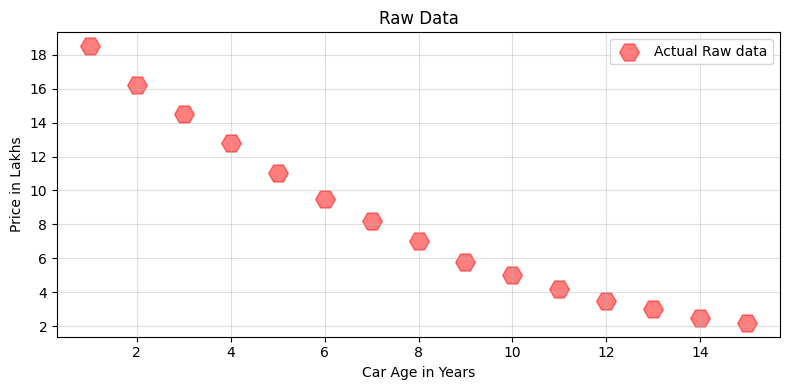

In [56]:
#visualization of data
X = df[['Car_Age_Years']].values
y = df[['Price_Lakhs']].values
plt.figure(figsize=(8,4))
plt.scatter(X,y,marker='H',label='Actual Raw data',color='r',alpha=0.5,s=200)
plt.ylabel('Price in Lakhs')
plt.xlabel('Car Age in Years')
plt.title('Raw Data')
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()


In [57]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

X_line = np.linspace(X.min(),X.max(),100).reshape(-1,1)
X_line_scaled = sc_X.transform(X_line)



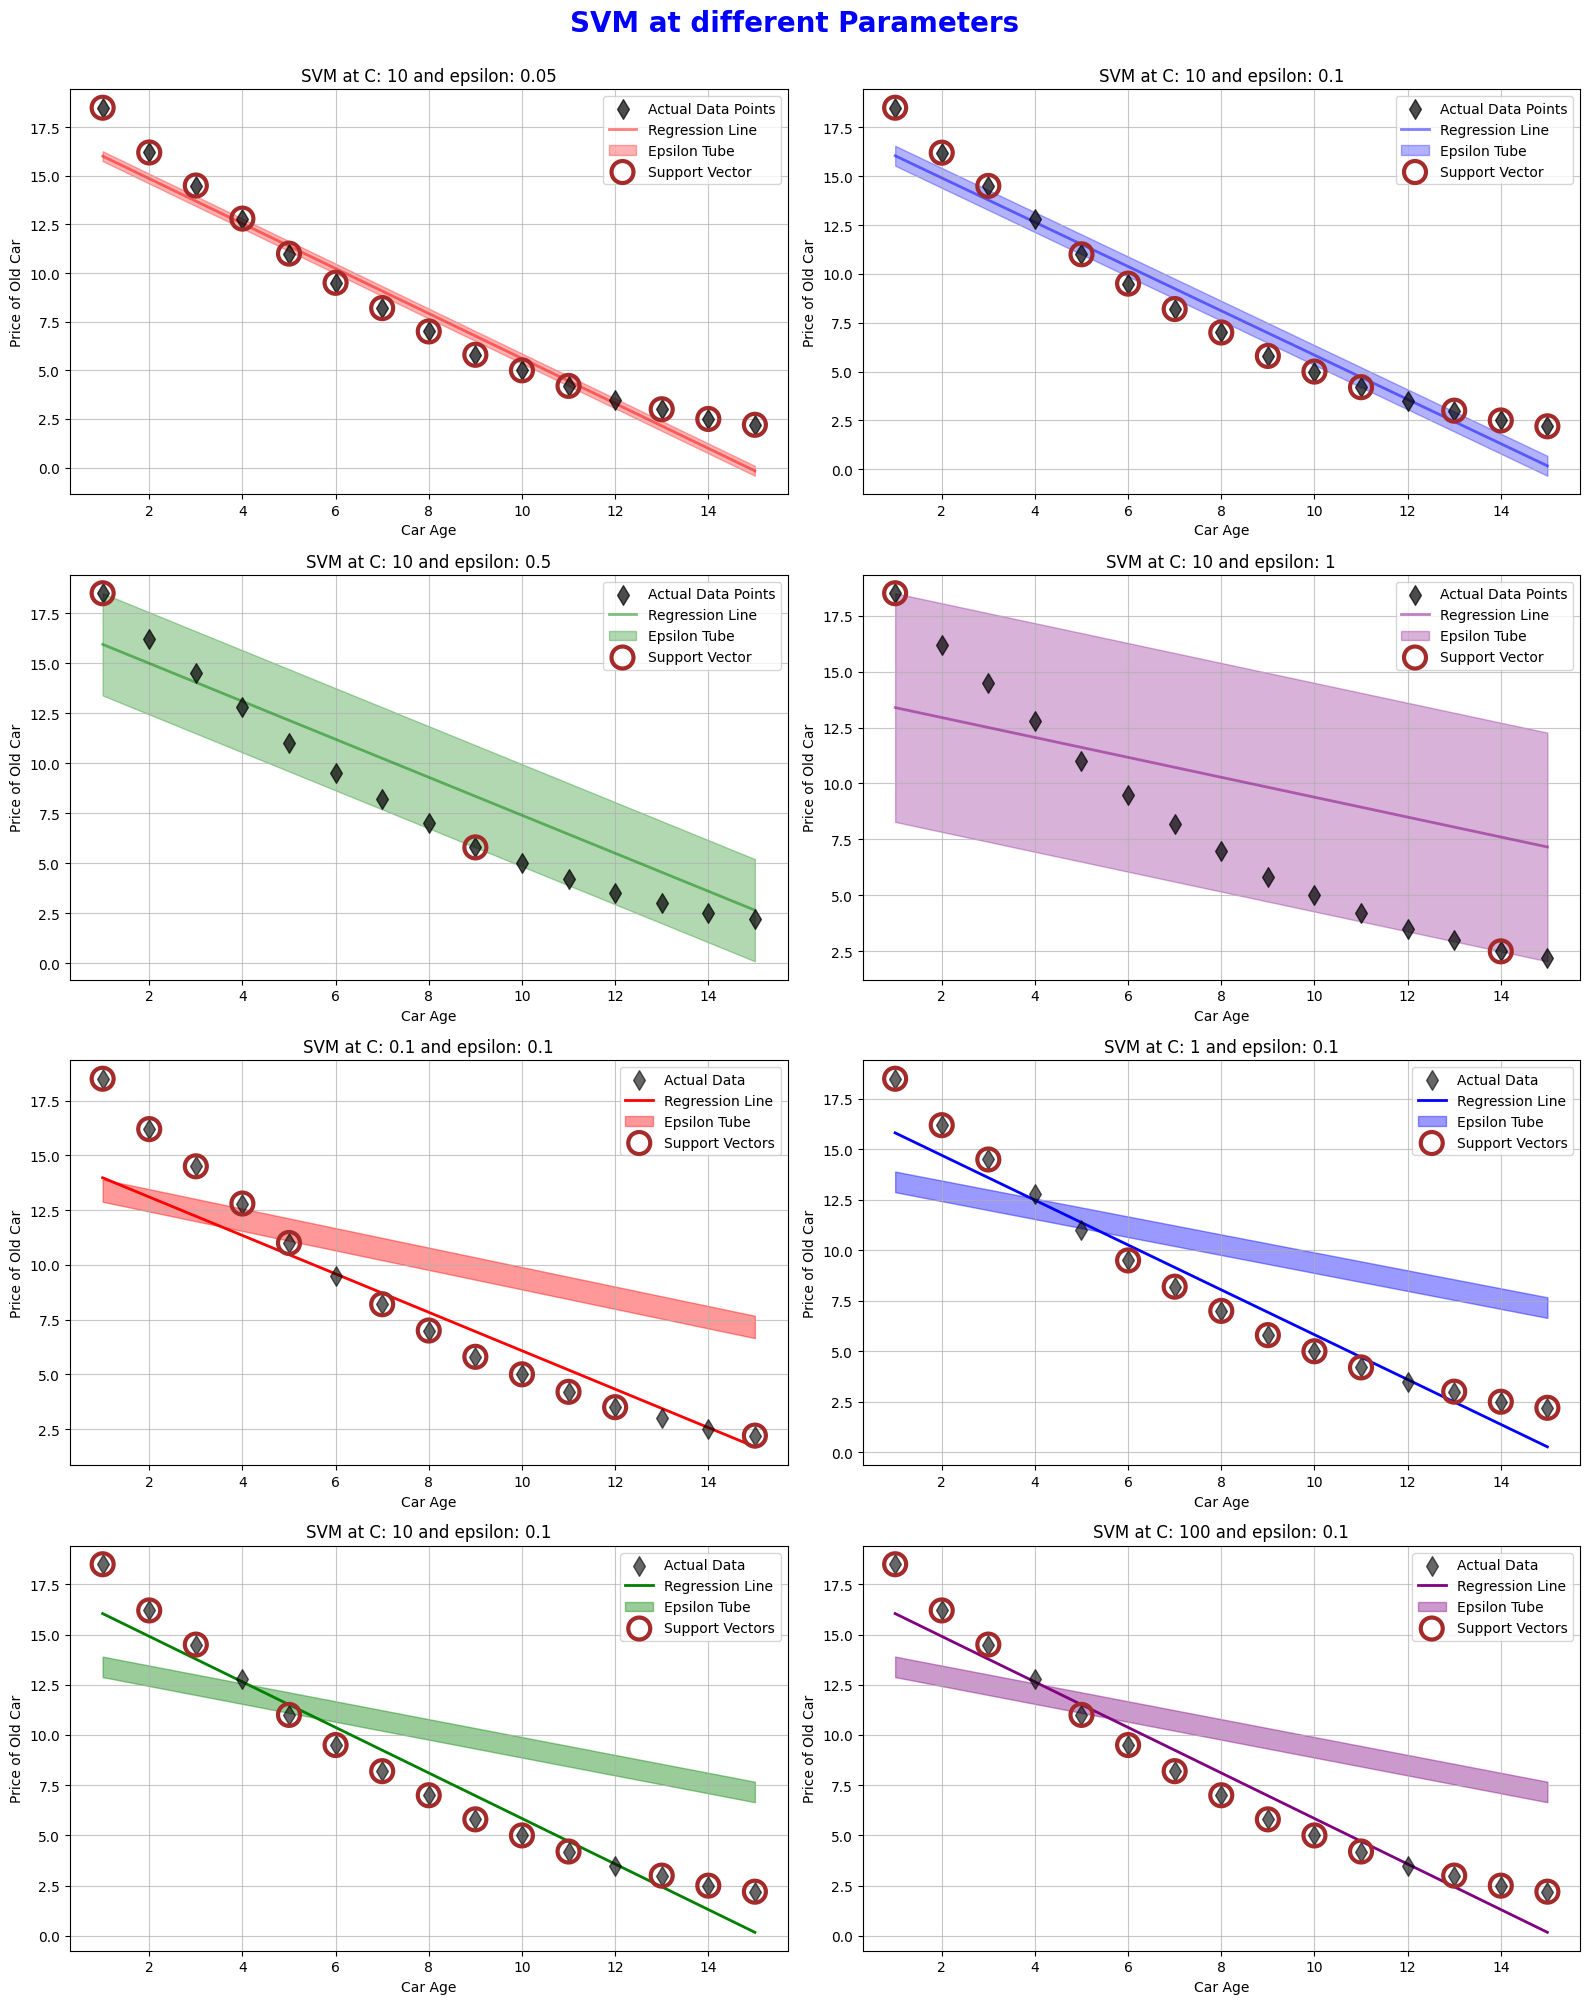

In [81]:
#Model traning
from sklearn.svm import SVR
Cs = [0.1,1,10,100]
epsilons=[0.05,0.1,0.5,1]
colors=['r','blue','green','purple']
markers = ['*','^','h',',']

fig, axes = plt.subplots(4,2,figsize=(16,20))
axes = axes.ravel()
fixed_eps = 0.1
fixed_C = 10

for idx, eps in enumerate(epsilons):
    svr_eps = SVR(kernel='linear',C=fixed_C,epsilon=eps)
    svr_eps.fit(X_scaled,y_scaled.ravel())

    y_pred_line_scaled = svr_eps.predict(X_line_scaled)
    y_pred_line = sc_y.inverse_transform(y_pred_line_scaled.reshape(-1,1))

    original_epsilon = svr_eps.epsilon * sc_y.scale_[0]
    y_upper = y_pred_line + original_epsilon
    y_lower = y_pred_line - original_epsilon

    #support vector
    sv = svr_eps.support_
    sv_X = X[sv]
    sv_y = y[sv]

    axes[idx].scatter(X,y,label='Actual Data Points',color='black',alpha=0.7,marker='d',s=100,zorder=5)
    axes[idx].plot(X_line,y_pred_line,label='Regression Line',color=colors[idx],linewidth=2,alpha=0.5)
    axes[idx].fill_between(X_line.ravel(),y_upper.ravel(),y_lower.ravel(),color=colors[idx],alpha=0.3,label='Epsilon Tube')
    axes[idx].scatter([sv_X],[sv_y],label='Support Vector',facecolor='none',s=250,edgecolor='brown',zorder=6,linewidth=3)
    axes[idx].set_ylabel('Price of Old Car')
    axes[idx].set_xlabel('Car Age')
    axes[idx].set_title(f'SVM at C: {fixed_C} and epsilon: {eps}')
    axes[idx].grid(True,alpha=0.7)
    axes[idx].legend()

for idx, C in enumerate(Cs):
    svr_C = SVR(kernel='linear',C=C,epsilon=fixed_eps)
    svr_C.fit(X_scaled,y_scaled.ravel())

    y_pred_line_scaled_C = svr_C.predict(X_line_scaled)
    y_pred_line_C = sc_y.inverse_transform(y_pred_line_scaled_C.reshape(-1,1))

    original_eps_C = svr_C.epsilon * sc_y.scale_[0]

    y_lower_C = y_pred_line - original_eps_C
    y_upper_C = y_pred_line + original_eps_C

    #support vectors
    sv_C = svr_C.support_
    sv_C_X = X[sv_C]
    sv_C_y = y[sv_C]

    axes[idx+4].scatter(X,y,label='Actual Data',color='black',alpha=0.6,marker='d',s=100,zorder=5)
    axes[idx+4].plot(X_line,y_pred_line_C,color=colors[idx],linewidth=2,label='Regression Line')
    axes[idx+4].fill_between(X_line.ravel(),y_lower_C.ravel(),y_upper_C.ravel(),label='Epsilon Tube',color=colors[idx],alpha=0.4)
    axes[idx+4].scatter([sv_C_X],[sv_C_y],label='Support Vectors',facecolor='none',s=250,zorder=6,edgecolor='brown',linewidth=3)
    axes[idx+4].set_ylabel('Price of Old Car')
    axes[idx+4].set_xlabel('Car Age')
    axes[idx+4].set_title(f'SVM at C: {C} and epsilon: {fixed_eps}')
    axes[idx+4].grid(True,alpha=0.7)
    axes[idx+4].legend()

plt.suptitle(f'SVM at different Parameters',fontweight=600,fontsize=20,y=1,color='blue')
plt.tight_layout()
plt.show()





